# Importando librera y DF

In [7]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [8]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [9]:
df=pd.read_excel('mex.xlsx')

In [10]:
df

,Resoluciones,Fecha,Resumen,Subtema,año
0,RES/060/2000,2000-04-06,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,2000
1,RES/075/2000,2000-04-28,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,2000
2,RES/140/2000,2000-07-14,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,2000
3,RES/150/2000,2000-08-07,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,2000
4,RES/240/2000,2000-12-15,RESOLUCION SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,2000
...,...,...,...,...,...
4463,RES/459/2020,2020-02-27,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,2020
4464,RES/457/2020,2020-02-27,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,2020
4465,RES/001/2020,2020-01-30,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,2020
4466,RES/439/2020,2020-01-30,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,2020


In [11]:
df.groupby(["año"])["Resumen"].count()

año
2000     28
2001     21
2002     36
2003     48
2004     23
2005    167
2006     89
2007    147
2008     80
2009     32
2010     80
2011    179
2012    203
2013    321
2014    345
2015    647
2016    474
2017    841
2018    456
2019    214
2020     37
Name: Resumen, dtype: int64

In [36]:
pd.crosstab(df.año, df.Subtema).to_excel("temas por año.xlsx")
pd.crosstab(df.año, df.Subtema, normalize="index").to_excel("proporcion de temas por año.xlsx")

In [7]:
df

,Resoluciones,Fecha,Resumen,Subtema,
0,RES/060/2000,2000-04-06,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,
1,RES/075/2000,2000-04-28,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,
2,RES/140/2000,2000-07-14,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,
3,RES/150/2000,2000-08-07,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,
4,RES/240/2000,2000-12-15,RESOLUCION SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,
...,...,...,...,...,...
4463,RES/459/2020,2020-02-27,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,
4464,RES/457/2020,2020-02-27,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,
4465,RES/001/2020,2020-01-30,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,
4466,RES/439/2020,2020-01-30,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,


In [8]:
df["AÑO"]=0

In [9]:

for i in range(len(df["AÑO"])):
    df["AÑO"][i]=df["Fecha"][i].year

In [10]:
df

,Resoluciones,Fecha,Resumen,Subtema,,AÑO
0,RES/060/2000,2000-04-06,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,,2000
1,RES/075/2000,2000-04-28,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,,2000
2,RES/140/2000,2000-07-14,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,,2000
3,RES/150/2000,2000-08-07,RESOLUCIÓN SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,,2000
4,RES/240/2000,2000-12-15,RESOLUCION SOBRE LA SOLICITUD DE PERMISO PARA ...,Producción independiente de energía eléctrica,,2000
...,...,...,...,...,...,...
4463,RES/459/2020,2020-02-27,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,,2020
4464,RES/457/2020,2020-02-27,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,,2020
4465,RES/001/2020,2020-01-30,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,,2020
4466,RES/439/2020,2020-01-30,RESOLUCIÓN DE LA COMISIÓN REGULADORA DE ENERGÍ...,Energía eléctrica,,2020


In [11]:
df.groupby(["AÑO"])["Resumen"].count()

AÑO
2000     28
2001     21
2002     36
2003     48
2004     23
2005    167
2006     89
2007    147
2008     80
2009     32
2010     80
2011    179
2012    203
2013    321
2014    345
2015    647
2016    474
2017    841
2018    456
2019    214
2020     37
Name: Resumen, dtype: int64

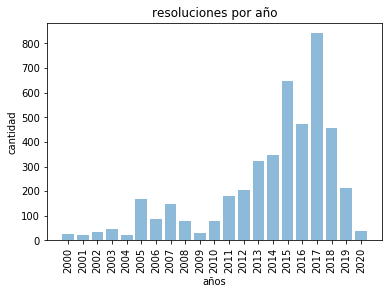

In [12]:
#Resoluciones por año
resoaño=df.groupby(["AÑO"])["Resumen"].count()
plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [501]:
df=pd.read_excel('mex.xlsx')
df["AÑO"]=0
for i in range(len(df["AÑO"])):
    df["AÑO"][i]=df["Fecha"][i].year

#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
#num_topics=10

#año
año=2020

#nombre
nombre=f"mex{año}.html"

In [502]:
df=df[df["AÑO"]==año]

In [503]:
#df

## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [504]:
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("trilogy", "")
df.Resumen=df.Resumen.str.replace("mhz", "")
df.Resumen=df.Resumen.str.replace("dgt", "")
df.Resumen=df.Resumen.str.replace("favor", "")
df.Resumen=df.Resumen.str.replace("por la cual", "")
df.Resumen=df.Resumen.str.replace("jd", "")
df.Resumen=df.Resumen.str.replace("mayo", "")

In [505]:
df

,Resoluciones,Fecha,Resumen,Subtema,,AÑO
4430,RES/538/2020,2020-03-27,de la comisión reguladora de energía que otor...,Energía eléctrica,,2020
4431,RES/539/2020,2020-03-27,de la comisión reguladora de energía que otor...,Energía eléctrica,,2020
4432,RES/540/2020,2020-03-27,de la comisión reguladora de energía que otor...,Energía eléctrica,,2020
4433,RES/541/2020,2020-03-27,de la comisión reguladora de energía que otor...,Energía eléctrica,,2020
4434,RES/542/2020,2020-03-27,de la comisión reguladora de energía que otor...,Energía eléctrica,,2020
4435,RES/543/2020,2020-03-27,por la que la comisión reguladora de energía ...,Energía eléctrica,,2020
4436,RES/544/2020,2020-03-27,por la que la comisión reguladora de energía ...,Energía eléctrica,,2020
4437,RES/545/2020,2020-03-27,de la comisión reguladora de energía por la q...,Energía eléctrica,,2020
4438,RES/546/2020,2020-03-27,de la comisión reguladora de energía por la q...,Energía eléctrica,,2020
4439,RES/537/2020,2020-03-10,por la que la comisión reguladora de energía ...,Energía eléctrica,,2020


In [506]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [507]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [508]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,acredita,acreditación,acreditación sistema,acreditación sistema cogeneración,acreditada,acreditada certificar,acreditada certificar centrales,amistad,anticipada,anticipada permiso,...,transporte,ubicación,ubicación descripción,ubicación descripción instalaciones,unidad,unidad acreditada,unidad acreditada certificar,único,único generación,único generación gen
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [509]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

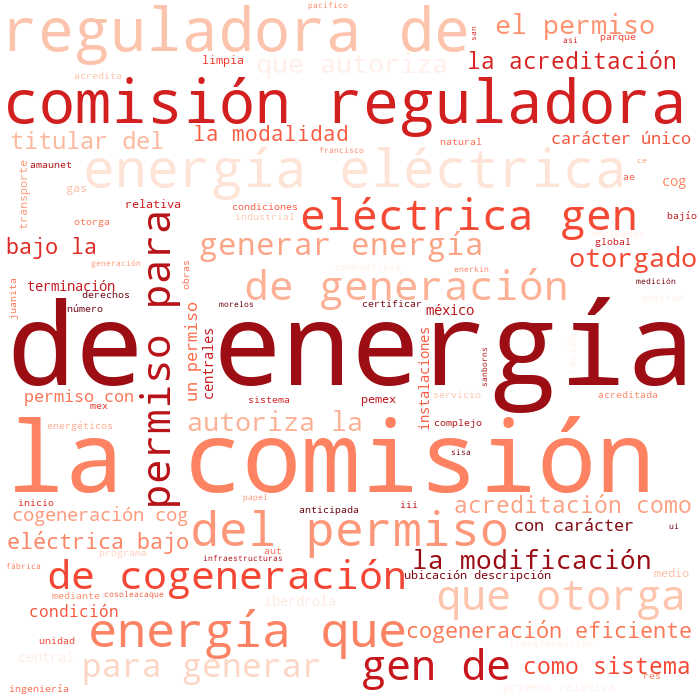

In [510]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [511]:
num_topics=13

In [512]:
# Cuántos tópicos deseo
#lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
#lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

In [513]:
#print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

Wall time: 3.47 s


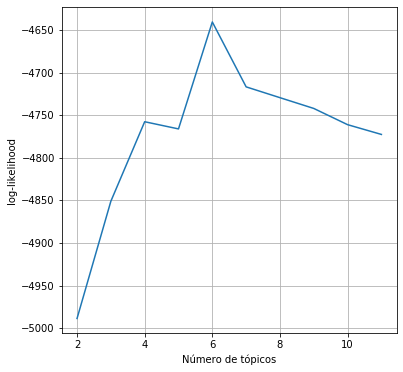

In [514]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,12,1)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')
plt.grid()

In [515]:
for i in range(len(values)):
    values[i]=str(values[i])
topics=dict(zip(values, likelihood))

In [516]:
num_topics=int(max(topics, key=lambda k: topics[k]))
#num_topics=8

In [517]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado# Cuántos tópicos deseo

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
(6, 188)


## Visualización del LDA

In [518]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

In [519]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook